In [1]:
import os, sys
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import pandas as pd

# 0. Prepare Data

In [2]:
os.chdir("/home/laiy/gitrepos/msr_final/LongTermEMG_myo")
from PrepareAndLoadData.process_data import read_data_training

In [3]:
data_dir = "/home/laiy/gitrepos/msr_final/Wearable_Sensor_Long-term_sEMG_Dataset/data"
processed_data_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Processed_datasets"
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
save_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Results"

In [6]:
path = data_dir
store_path = processed_data_dir
# read_data_training(path=data_dir, store_path = store_path)

# 1. TSD_DNN

In [7]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_standard import \
            test_TSD_DNN_on_training_sessions, train_fine_tuning


In [8]:
# check stored pickle 
with open(store_path + "/training_session.pickle", 'rb') as f:
    dataset_training = pickle.load(file=f)

examples_datasets_train = dataset_training['examples_training']
print('traning examples ', np.shape(examples_datasets_train))
labels_datasets_train = dataset_training['labels_training']
print('traning labels ', np.shape(labels_datasets_train))

traning examples  (1, 3, 40, 572, 50, 8)
traning labels  (1, 3, 40, 572)


In [9]:
path_to_save_to = "Weights_TSD/TSD"
num_kernels=[200, 200, 200]                        # model layer size 
number_of_cycle_for_first_training=4               # #session
number_of_cycles_rest_of_training=4     
path_to_save_to="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_TSD/TSD"
number_of_classes=22
batch_size=128          
feature_vector_input_length=400                     # size of one example 
learning_rate=0.002515

In [12]:
train_fine_tuning(examples_datasets_train, labels_datasets_train,
                  num_kernels=num_kernels, path_weight_to_save_to=path_to_save_to,
                  number_of_classes=number_of_classes,
                  batch_size=batch_size,
                  feature_vector_input_length=feature_vector_input_length,
                  learning_rate=learning_rate)

GET one participant_examples  (3, 40, 572, 50, 8)
   GET one training_index_examples  (40, 572, 50, 8)  at  0
   GOT one group XY  (22880, 400)    (22880,)
       one group XY test  (0,)    (0,)
       one group XY train (20592, 400)    (20592,)
       one group XY valid (2288, 400)    (2288, 400)
   GET one training_index_examples  (40, 572, 50, 8)  at  1
   GOT one group XY  (22880, 400)    (22880,)
       one group XY test  (0,)    (0,)
       one group XY train (20592, 400)    (20592,)
       one group XY valid (2288, 400)    (2288, 400)
   GET one training_index_examples  (40, 572, 50, 8)  at  2
   GOT one group XY  (22880, 400)    (22880,)
       one group XY test  (0,)    (0,)
       one group XY train (20592, 400)    (20592,)
       one group XY valid (2288, 400)    (2288, 400)
dataloaders: 
   train  (1, 3)
   valid  (1, 3)
   test  (1, 0)
START TRAINING
Participant:  0
Session:  0
TSD_Network(
  (_network): ModuleList(
    (0): LinearBlocks(
      (fully_connected_1): Linear(

/home/laiy/.local/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


train Loss: 0.02146887 Acc: 0.14428711
val Loss: 0.00099017 Acc: 0.23557692
New best validation loss: 0.000990167051762134
Epoch 1 of 500 took 1.509s
Epoch 1/499
----------
train Loss: 0.01752786 Acc: 0.2309082
val Loss: 0.00087059 Acc: 0.30463287
New best validation loss: 0.0008705903391738038
Epoch 2 of 500 took 1.572s
Epoch 2/499
----------
train Loss: 0.01568067 Acc: 0.296875
val Loss: 0.00073806 Acc: 0.39816434
New best validation loss: 0.0007380602972490804
Epoch 3 of 500 took 1.499s
Epoch 3/499
----------
train Loss: 0.01426989 Acc: 0.35751953
val Loss: 0.00066723 Acc: 0.45979021
New best validation loss: 0.0006672290863690677
Epoch 4 of 500 took 1.533s
Epoch 4/499
----------
train Loss: 0.01336666 Acc: 0.39067383
val Loss: 0.00059305 Acc: 0.50218531
New best validation loss: 0.0005930504807225474
Epoch 5 of 500 took 1.458s
Epoch 5/499
----------
train Loss: 0.01256744 Acc: 0.42207031
val Loss: 0.00055557 Acc: 0.55157343
New best validation loss: 0.0005555666097394236
Epoch 6 of

train Loss: 0.00657283 Acc: 0.690625
val Loss: 0.00030223 Acc: 0.75087413
Epoch 55 of 500 took 1.344s
Epoch 55/499
----------
train Loss: 0.00654665 Acc: 0.69375
val Loss: 0.00034354 Acc: 0.71416084
Epoch 56 of 500 took 1.334s
Epoch 56/499
----------
train Loss: 0.00656558 Acc: 0.68979492
val Loss: 0.00029949 Acc: 0.74562937
Epoch 57 of 500 took 1.329s
Epoch 57/499
----------
train Loss: 0.00654331 Acc: 0.68989258
val Loss: 0.00037890 Acc: 0.68269231
Epoch    58: reducing learning rate of group 0 to 1.0060e-04.
Epoch 58 of 500 took 1.341s
Epoch 58/499
----------
train Loss: 0.00633703 Acc: 0.7034668
val Loss: 0.00032311 Acc: 0.74694056
Epoch 59 of 500 took 1.400s
Epoch 59/499
----------
train Loss: 0.00633975 Acc: 0.70527344
val Loss: 0.00029754 Acc: 0.75131119
Epoch 60 of 500 took 1.331s
Epoch 60/499
----------
train Loss: 0.00640558 Acc: 0.70175781
val Loss: 0.00032264 Acc: 0.72945804
Epoch 61 of 500 took 1.334s
Epoch 61/499
----------
train Loss: 0.00633103 Acc: 0.70810547
val Loss:

train Loss: 0.00689436 Acc: 0.68500977
val Loss: 0.00031585 Acc: 0.73120629
Epoch 30 of 500 took 1.347s
Epoch 30/499
----------
train Loss: 0.00691168 Acc: 0.68554688
val Loss: 0.00031966 Acc: 0.74300699
Epoch 31 of 500 took 1.334s
Epoch 31/499
----------
train Loss: 0.00687395 Acc: 0.68422852
val Loss: 0.00031913 Acc: 0.74431818
Epoch 32 of 500 took 1.341s
Epoch 32/499
----------
train Loss: 0.00687324 Acc: 0.68657227
val Loss: 0.00031228 Acc: 0.74431818
Epoch 33 of 500 took 1.323s
Epoch 33/499
----------
train Loss: 0.00681486 Acc: 0.69208984
val Loss: 0.00030230 Acc: 0.7465035
Epoch 34 of 500 took 1.323s
Epoch 34/499
----------
train Loss: 0.00680328 Acc: 0.69179687
val Loss: 0.00029231 Acc: 0.76617133
New best validation loss: 0.000292308498304207
Epoch 35 of 500 took 1.411s
Epoch 35/499
----------
train Loss: 0.00679650 Acc: 0.68999023
val Loss: 0.00031087 Acc: 0.76223776
Epoch 36 of 500 took 1.436s
Epoch 36/499
----------
train Loss: 0.00682596 Acc: 0.68837891
val Loss: 0.0003260

train Loss: 0.00798710 Acc: 0.63178711
val Loss: 0.00037065 Acc: 0.69711538
Epoch 23 of 500 took 1.344s
Epoch 23/499
----------
train Loss: 0.00791184 Acc: 0.63671875
val Loss: 0.00037238 Acc: 0.67132867
Epoch 24 of 500 took 1.330s
Epoch 24/499
----------
train Loss: 0.00795066 Acc: 0.62739258
val Loss: 0.00034578 Acc: 0.7027972
Epoch 25 of 500 took 1.331s
Epoch 25/499
----------
train Loss: 0.00777979 Acc: 0.640625
val Loss: 0.00034343 Acc: 0.69798951
Epoch    26: reducing learning rate of group 0 to 5.0300e-04.
Epoch 26 of 500 took 1.353s
Epoch 26/499
----------
train Loss: 0.00763168 Acc: 0.64243164
val Loss: 0.00032938 Acc: 0.71853147
New best validation loss: 0.00032937683008767507
Epoch 27 of 500 took 1.427s
Epoch 27/499
----------
train Loss: 0.00751972 Acc: 0.64775391
val Loss: 0.00032991 Acc: 0.72858392
Epoch 28 of 500 took 1.358s
Epoch 28/499
----------
train Loss: 0.00730410 Acc: 0.6609375
val Loss: 0.00031427 Acc: 0.72902098
New best validation loss: 0.0003142704132136765
E

In [14]:
save_path = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results_tsd"
algo_name = "standard_TSD"
test_TSD_DNN_on_training_sessions(examples_datasets_train, labels_datasets_train,
                                  num_neurons=num_kernels, use_only_first_training=True,
                                  path_weights=path_to_save_to,
                                  feature_vector_input_length=feature_vector_input_length,
                                  save_path = save_path, algo_name=algo_name,
                                  number_of_classes=number_of_classes, cycle_for_test=3)

GET one participant_examples  (3, 40, 572, 50, 8)
   GET one training_index_examples  (40, 572, 50, 8)  at  0
   GOT one group XY  (22880, 400)    (22880,)
       one group XY test  (5720, 400)    (5720, 400)
       one group XY train (20592, 400)    (20592,)
       one group XY valid (2288, 400)    (2288, 400)
   GET one training_index_examples  (40, 572, 50, 8)  at  1
   GOT one group XY  (22880, 400)    (22880,)
       one group XY test  (5720, 400)    (5720, 400)
       one group XY train (20592, 400)    (20592,)
       one group XY valid (2288, 400)    (2288, 400)
   GET one training_index_examples  (40, 572, 50, 8)  at  2
   GOT one group XY  (22880, 400)    (22880,)
       one group XY test  (5720, 400)    (5720, 400)
       one group XY train (20592, 400)    (20592,)
       one group XY valid (2288, 400)    (2288, 400)
dataloaders: 
   train  (1, 3)
   valid  (1, 3)
   test  (1, 3)
TSD_Network(
  (_network): ModuleList(
    (0): LinearBlocks(
      (fully_connected_1): Linear(i

In [15]:
results_filename = save_path + '/predictions_' + algo_name + "_no_retraining.npy"
results = np.load(results_filename, allow_pickle=True)
TSD_acc = results[0]
TSD_acc_overall = np.mean(TSD_acc)
TSD_df = pd.DataFrame(TSD_acc.transpose(), 
                       index = [f'Session_{i}' for i in range(TSD_acc.shape[0])],
                        columns = [f'Participant_{j}' for j in range(1)])
TSD_df

,Participant_0
Session_0,0.882867
Session_1,0.516434
Session_2,0.545804


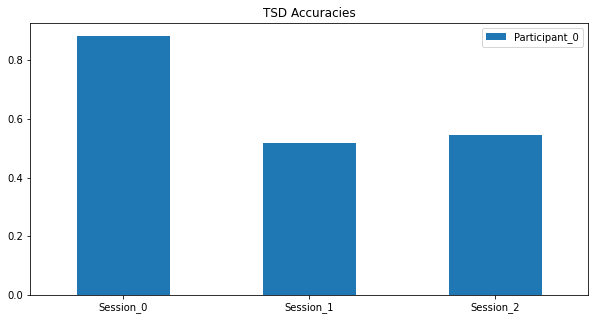

In [16]:
TSD_df.plot.bar(rot=0, figsize=(10,5))
plt.title("TSD Accuracies")
plt.show()